In [1]:
# !pip -q install pandas openpyxl matplotlib transformers "numpy<2" torch==2.3.0 nltk

In [2]:
import pandas as pd
import numpy as np

# Define file paths
filepath1 = r"Raw Web Reviews 2023-2024.xlsx"
filepath2 = r"Combined Survey+Web review.xlsx"

# Read the Excel files into DataFrames
raw_df = pd.read_excel(filepath1, dtype=str)
combined_df = pd.read_excel(filepath2, dtype=str)

# raw_df.count()                                # 48,404 records
# raw_df['Verbatim Text'].nunique()             # 41,365 unique text reviews
# raw_df['Product Name'].nunique()              # 185 unique products
# raw_df['Product Number (SKU)'].nunique()      # 185 unique product number SKUs
# raw_df['Review Source'].nunique()             # 10 unique review source
# raw_df['Ink Supply Type'].nunique()           # 2 Ink Supply Type; IIC (Ink-In-Cap) & IPH (Ink Per Head)

combined_df['predicted'].unique()

array(['Ink/toner - General satisfied', 'Does not print black', 'others',
       'Shipment', 'Instant Ink - General satisfied', 'Good performance',
       'Rejects third party', 'Cost', 'Ink/toner - Level',
       'Error message/faulty', 'Noisy', 'Print quality',
       'Purchasing experience', 'Bought/Received wrong cartridge',
       'cs experience', 'HW issue', 'Instant Ink  - Issue with sign-up',
       'Not reachable/ Call disconnected',
       'Not actionable (Insufficient info)', 'Cartridge design',
       'Does not print color', 'Unable to print in single cartridge mode',
       'Brand loyalty', 'Ink/toner - Empty/Dried',
       'Ink/toner - Availability', 'Instant Ink - Billing',
       'Ink/toner - Supplies installation', 'Genuine or non-HP',
       'Incompatible', 'Ink/toner - Leakage', 'Tampered/used cartridge',
       'Ink not full', 'Blank page', 'Instant Ink - Forced sign-up',
       'Instant Ink - Misperception/dislike', 'Instant Ink - Shipment',
       'Unable to print

In [30]:
# Show all rows
pd.set_option('display.max_rows', None)

# Show all columns
pd.set_option('display.max_columns', None)

# Adjust the width to avoid truncation
pd.set_option('display.width', 1000)

combined_df.head(3)

,Survey ID,Product Name,Print Customer Region,LTR,Overall Satisfaction,Setup Success,Finding the right printer,Buying the printer,Setting up the printer,Using the printer,Experience Satisfaction Scores (Avg),Reason for Experience Satisfaction Score,Translation to English for: Reason for Experience Satisfaction Score,Flex Question,Confident printer meets needs,Easy to compare models,Easy to select printer wanted,Obtained printer without delay,Satisfied with value of purchase,Friend or family recommendation,Previous experience with HP printers,Previous experience with non-HP printers,Purchase Decision Influencer (Other),The box included everything I needed,Setup instructions,Connecting to a wireless network,Connecting multiple devices to the printer,Ease of the setup process,Time required to complete setup,Availability of help,Printing,Printing from secondary device,Scanning,Document Print quality,Photo Print quality,Print speed,Use of HP Smart app,Printer Setup Location,Printer Setup Location (Other),Primary Print Device,Primary Print Device (Other),Instant Ink Subscriber,Previous Printer Brand,Previous Printer Brand (Other),Printer Still Owned,Current Printer Environment,Current Printer Environment (Other),Reason for OSAT Score (LTO),Translation to English for: Reason for OSAT Score (LTO),Confident printer jobs complete successfully,Easy to accomplish tasks,Satisfied with print quality,Printer features meet needs,Printer is reliable,Trust HP to help resolve printer issues,Know how to get help,Use Experience Comment,Translation to English for: Use Experience Comment,Current Printer Use,Ink or Toner Purchased,Printer Supplies (Other),HP phone support,HP product repair/replacement,HP web-based chat support,HP community support forums,HP.com support page,YouTube videos,I have not needed help,Other,Printer Support Options (Other),Age Range,Gender,Gender (Not Listed),Brand Name,Product Big Series,Product Series,Product Sub Category 1,Product Sub Category 2,Product Born Date,Product Registration Date,Product Purchase Date,Sub-category Name (Derived),Product Category (Derived),Source Type,Product Reviews Flag,Product Service Date,Survey language,HP Organization Name,Survey Version,Invitation date,Response Date,Month of Response Date,Survey status,Review Id,Review Count,Review Source,Star Rating,Product Family,Supplies Family,Printer Family,Model Name,Tell us the primary reason for not choosing HP+:\n,Tell us the primary reason for not choosing HP+ (Other),Printer Research Main Source,Printer Research Main Source(other),Printer Purchase Location,Printer Purchase Location (Other),HP+ Benefits Awareness Timing,HP+ Requirements Awareness Timing,Combined Text,predicted,predicted_probabilities,Ink Supply Type,Ink cartridge number,length
0,251212488,HP 62 Tri-color Original Ink Cartridge,US,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Web Reviews,NaN,NaN,English,NaN,NaN,NaN,2023-06-30 19:25:59,2023-06-01 00:00:00,COMPLETED,f4dba937-378d-4860-8bf4-626cbb634e87,1,HP US,5,Supplies - Ink,Minotaur,NaN,HP 62 Tri-color Original Ink Cartridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,product great,Ink/toner - General satisfied,0.970894889234059,IPH,NaN,13
1,252503868,HP 62XL High Yield Black Original Ink Cartridge,US,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Web Reviews,NaN,NaN,English,NaN,NaN,NaN,2023-06-30 18:49:25,2023-06-01 00:00:00,COMPLETED,f0d3426e-64d4-4324-9d82-516f5910327f,1,HP US,5,Supplies - Ink,Minotaur,Na

In [35]:
import pandas as pd

# Adjust pandas settings to show all rows and columns without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Specify the columns you're interested in
columns_of_interest = ['Product Name', 'Print Customer Region', 'Source Type', 'Review Source', 'Star Rating', 'Product Family', 'Supplies Family', 'Model Name', 'predicted', 'Ink Supply Type']  # Replace with your column names

# Loop through each column and print unique values with their counts
for col in columns_of_interest:
    unique_count = combined_df[col].nunique()
    print(f"The number of unique values in {col}: {unique_count}\n")
    print(combined_df[col].value_counts())
    print("\n" + "-"*50 + "\n")

The number of unique values in Product Name: 617

Product Name
DeskJet 2700 All-in-One Printer series                                                6160
HP DeskJet 2755e All-in-One Printer                                                   4416
ENVY 6000 All-in-One Printer series                                                   4378
HP OfficeJet Pro 8025e All-in-One Printer                                             3916
HP DeskJet 4155e All-in-One Printer                                                   3713
HP ENVY 6055e All-in-One Printer                                                      3293
HP OfficeJet Pro 9015e All-in-One Printer                                             2994
HP OfficeJet Pro 8020 series                                                          2919
DeskJet 4100 All-in-One Printer series                                                2865
HP ENVY 6455e All-in-One Printer                                                      2239
HP DeskJet 2742e All-in-One

In [3]:
import re 

# Get unique lower text data from Verbatim Text (Translated) & Verbatim Text
# *** potential loss of nuance from global lowercase
raw_df['text'] = raw_df['Verbatim Text (Translated)'].replace('', np.nan).fillna(raw_df['Verbatim Text']).str.lower()
unique_df = raw_df[['Product Name', 'Star Rating', 'Product Number (SKU)', 'Review Source', 'text', 'Ink Supply Type']].drop_duplicates(keep=False).reset_index(drop=True)

# Create proxy sentiment based on 'Star Rating'
unique_df['sentiment'] = unique_df['Star Rating'].astype(int).apply(lambda x: 'positive' if x >= 4 else 'negative')
# unique_df['sentiment'] = unique_df['Star Rating'].astype(int).apply(lambda x: 'positive' if x >= 4 else ('neutral' if x == 3 else 'negative'))

# Function to count the number of sentences
def count_sentences(text):
    if not isinstance(text, str):  # Check if the input is a string
        text = ''  # Treat non-strings (e.g., floats) as empty text
    sentences = re.split(r'[.!?]', text)
    # Filter out empty strings from splitting
    return len([s for s in sentences if s.strip()])

# Apply the function to count sentences for each record
unique_df['sentence_count'] = unique_df['text'].apply(count_sentences)

unique_df.head(3)

,Product Name,Star Rating,Product Number (SKU),Review Source,text,Ink Supply Type,sentiment,sentence_count
0,HP 951XL High Yield Yellow Original Ink Cartridge,5,CN048AA,HP US,quick and easy ordering.,IIC,positive,1
1,HP 63 Tri-color Original Ink Cartridge,4,1VV35AA,Walmart,the cartridges do not last like they use to. i...,IPH,positive,2
2,HP 63 Tri-color Original Ink Cartridge,4,1VV35AA,Walmart,this ink always does the job.very satisfactory.,IPH,positive,2


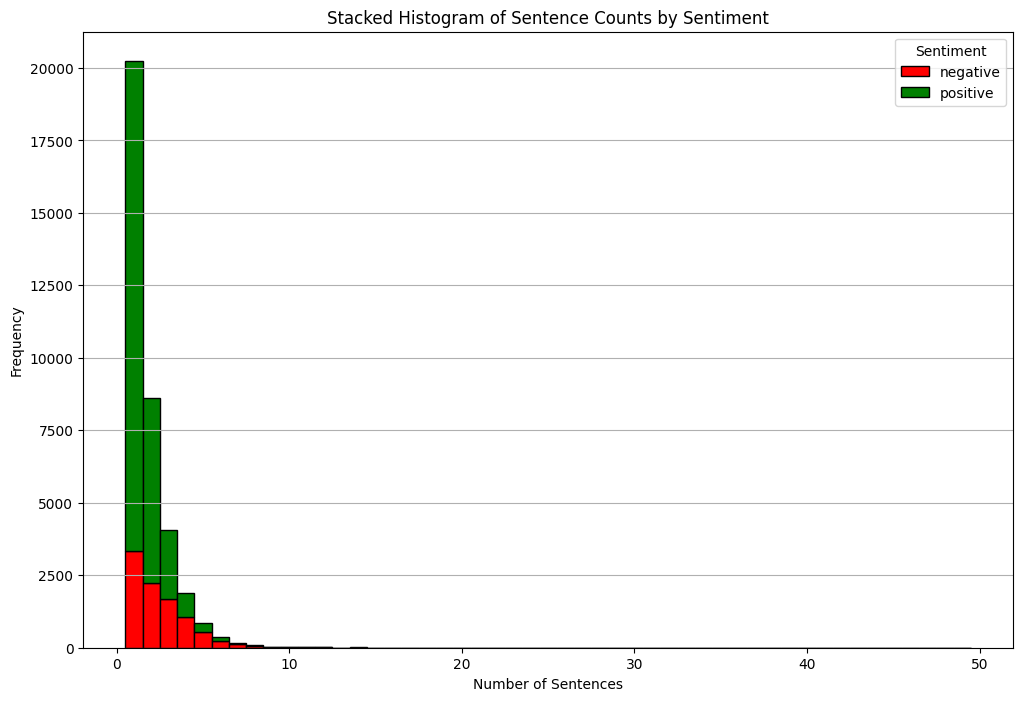

In [4]:
import re
import matplotlib.pyplot as plt

# Function to count the number of sentences
def count_sentences(text):
    if not isinstance(text, str):  # Check if the input is a string
        text = ''  # Treat non-strings (e.g., floats) as empty text
    sentences = re.split(r'[.!?]', text)
    # Filter out empty strings from splitting
    return len([s for s in sentences if s.strip()])

# Apply the function to count sentences for each record
unique_df['sentence_count'] = unique_df['text'].apply(count_sentences)

# Define colors for Sentiment
colors = {'negative': 'red', 'positive': 'green'}

# Create bins
bins = np.arange(1, unique_df['sentence_count'].max() + 2) - 0.5  # Center bins on integer values
bin_centers = (bins[:-1] + bins[1:]) / 2  # For placing the labels in the center

# Initialize the figure
plt.figure(figsize=(12, 8))

# Plot histogram for each sentiment
bottoms = np.zeros(len(bins) - 1)  # Initialize bottoms to zero for stacking

for sentiment, color in colors.items():
    subset = unique_df[unique_df['sentiment'] == sentiment]
    hist, _ = np.histogram(subset['sentence_count'], bins=bins)
    plt.bar(bin_centers, hist, width=1, color=color, edgecolor='black', label=sentiment, align='center', bottom=bottoms)
    bottoms += hist  # Update the bottoms for stacking

plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of Sentence Counts by Sentiment')
plt.legend(title='Sentiment')
plt.grid(axis='y')
plt.show()

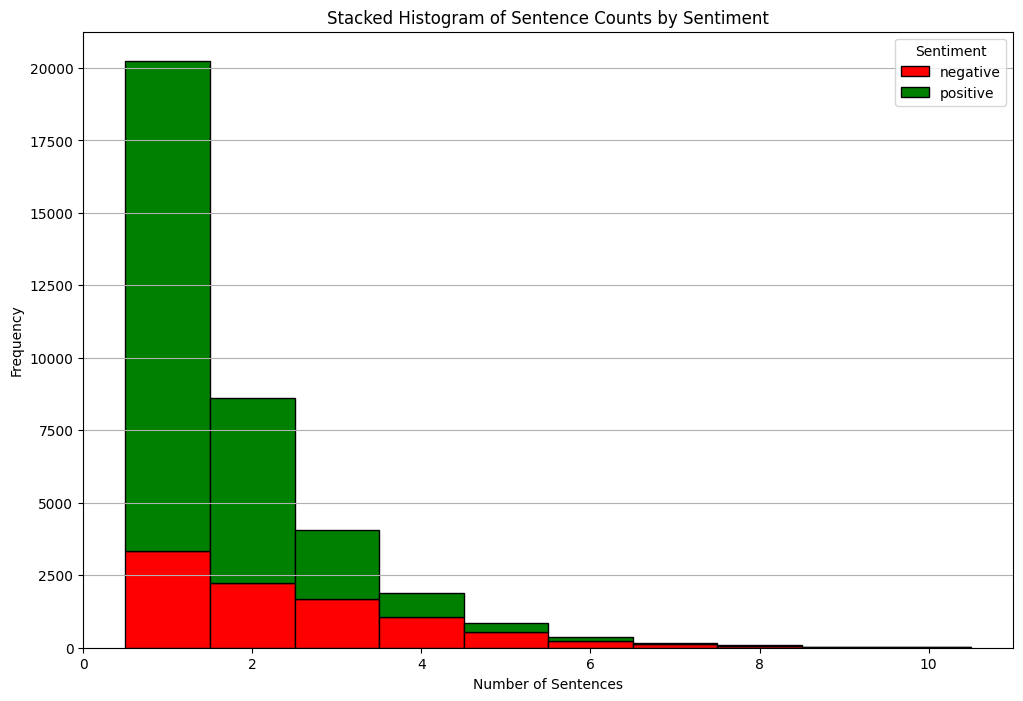

In [5]:
# Condition: Filter only reviews where no. of sentence <= 1
n = 10
filtered_df = unique_df[unique_df['sentence_count'] <= n]

# Define colors for Sentiment
colors = {'negative': 'red', 'positive': 'green'}

# Create bins
bins = np.arange(1, filtered_df['sentence_count'].max() + 2) - 0.5  # Center bins on integer values
bin_centers = (bins[:-1] + bins[1:]) / 2  # For placing the labels in the center

# Initialize the figure
plt.figure(figsize=(12, 8))

# Plot histogram for each sentiment
bottoms = np.zeros(len(bins) - 1)  # Initialize bottoms to zero for stacking

for sentiment, color in colors.items():
    subset = filtered_df[filtered_df['sentiment'] == sentiment]
    hist, _ = np.histogram(subset['sentence_count'], bins=bins)
    plt.bar(bin_centers, hist, width=1, color=color, edgecolor='black', label=sentiment, align='center', bottom=bottoms)
    bottoms += hist  # Update the bottoms for stacking

plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of Sentence Counts by Sentiment')
plt.legend(title='Sentiment')
plt.grid(axis='y')
plt.show()

In [6]:
reviews_df = combined_df[['Survey ID', 'Combined Text']].dropna().drop_duplicates()
reviews_df = reviews_df.drop_duplicates().reset_index()
reviews = reviews_df['Combined Text']

In [7]:
# Install spacy Language Model

import subprocess
import sys

# Function to install the spaCy language model
def install_spacy_model():
    try:
        # Use subprocess to run the shell command for installing the model
        subprocess.check_call([sys.executable, "-m", "spacy", "download", "en_core_web_sm"])
        print("Model installed successfully.")
    except subprocess.CalledProcessError as e:
        print(f"Error occurred while installing the model: {e}")

# Install the language model
install_spacy_model()

# Now load the installed model
import spacy
nlp = spacy.load("en_core_web_sm")
print("SpaCy model loaded successfully.")

Model installed successfully.
SpaCy model loaded successfully.


In [8]:
# Entity and Aspect Mining Heuristic

import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

eg = 5000
print(reviews_df["Combined Text"][eg])
#process it using spacy
doc = nlp(reviews_df["Combined Text"][eg])
for idno, sentence in enumerate(doc.sents):
    print ('Sentence {}:'.format(idno + 1), sentence)

capability want print great attractive design love color sleek look
Sentence 1: capability want print great attractive design love color sleek look


In [9]:
for sent in doc.sents:
    print ("------")
    for token in sent:
        print(token.text, token.dep_, token.head.text, token.head.pos_,
              [child for child in token.children])

------
capability nsubj want VERB []
want ROOT want VERB [capability, look]
print compound look NOUN []
great amod look NOUN []
attractive amod look NOUN []
design compound love NOUN []
love nmod color NOUN [design]
color nmod look NOUN [love]
sleek amod look NOUN []
look dobj want VERB [print, great, attractive, color, sleek]


In [10]:
# visualize the dependencies.
displacy.render(doc.sents, style='dep', jupyter=True, options = { 'distance':80 })

In [11]:
def getDep(sentence, rel):
    deps=[]
    print ("Input sentence is: " + str(sentence))
    for tok in sentence:
        dep =  (tok.text, tok.dep_, "---> ", tok.head.text)
        print(dep)
        deps.append(dep)
    result = list(filter(lambda x : x[1]==rel or x[1].find(rel)!=-1, deps))
    if len(result) == 0 : return 999
    return result

found = getDep(nlp(reviews_df["Combined Text"][eg]), "obj")
print ("The result is :" + str(found))

Input sentence is: capability want print great attractive design love color sleek look
('capability', 'nsubj', '---> ', 'want')
('want', 'ROOT', '---> ', 'want')
('print', 'compound', '---> ', 'look')
('great', 'amod', '---> ', 'look')
('attractive', 'amod', '---> ', 'look')
('design', 'compound', '---> ', 'love')
('love', 'nmod', '---> ', 'color')
('color', 'nmod', '---> ', 'look')
('sleek', 'amod', '---> ', 'look')
('look', 'dobj', '---> ', 'want')
The result is :[('look', 'dobj', '---> ', 'want')]


In [12]:
def getTriple(sentence):
    deps=[]
    for tok in sentence:
        dep =  (tok.text, tok.dep_, "---> ", tok.head.text)
        deps.append(dep)
    subj = list(filter(lambda x : x[1]=="nsubj", deps))
    obj = list(filter(lambda x : x[1]=="dobj", deps))
    root = list(filter(lambda x : x[1]=="ROOT" , deps))

    try:
        triple = (subj[0][0], root[0][0], obj[0][0])
    except IndexError:
        print ("Pattern incorrect. No triples for " + str(sentence)) # rules needed to be written to extract some triples
        print ("The dependencies are: " + str(deps))
        return None
    return triple

triples=[]
s = reviews_df["Combined Text"][eg]
#doing it sentence by sentence
for sentence in nlp(s).sents:
  triple = getTriple(sentence)  # obtain triples in that sentence
  print ("Triple is " + str(triple))
  triples.append(triple)

Triple is ('capability', 'want', 'look')


In [13]:
reviews_df

,index,Survey ID,Combined Text
0,0,251212488,product great
1,1,252503868,item black cartridge divert time work fine
2,2,57619273,text easy understand
3,3,167167912,service excellent ink cartridge arrive next da...
4,4,251212606,easy understand way write
...,...,...,...
96156,163573,377486542,This is the only one I use for my HP printer. ...
96157,163575,123460320,Great price and arrived even earlier than stated.
96158,163576,110020182,"Excllent quality; easy to order, received prom..."
96159,163578,38348103,I always use HP ink as remanufactured are neve...


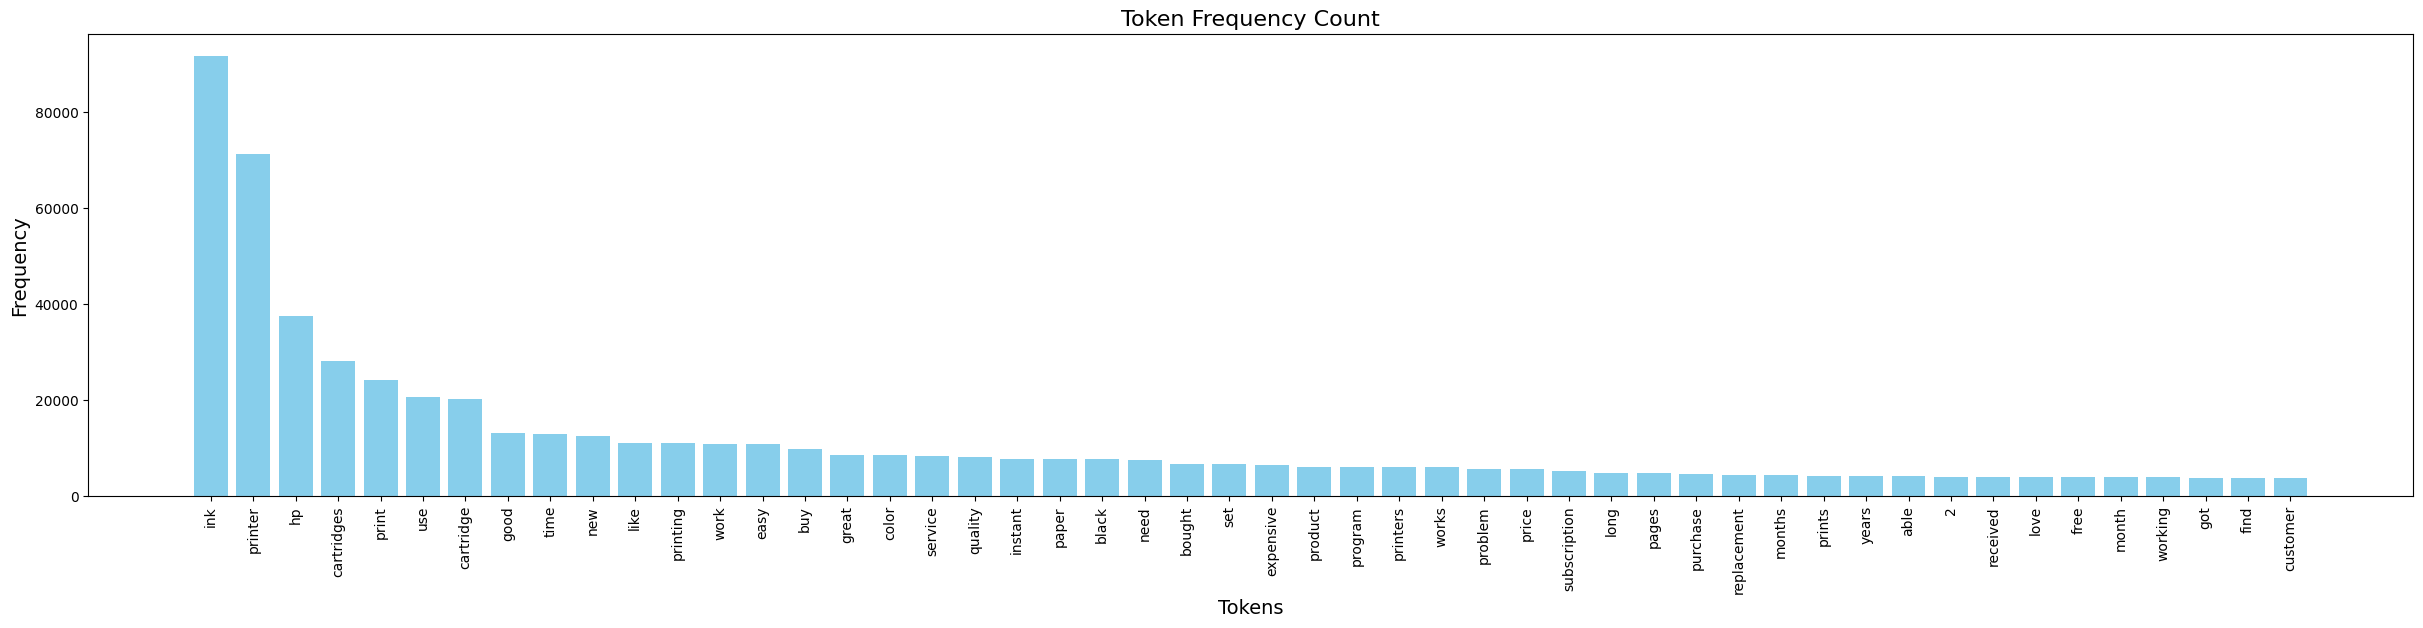

In [14]:
# runtime ~15s

import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
from collections import Counter

# Ensure nltk is ready for tokenization
# nltk.download('punkt')
# nltk.download()

# Tokenize the sentences and flatten the list
tokens = reviews_df['Combined Text'].head(100000).apply(nltk.word_tokenize).explode().str.lower()

# Get stopwords from NLTK and define a punctuation list
stopwords = set(nltk.corpus.stopwords.words('english'))
punctuation = set(string.punctuation)

# Get stopwords from spaCy
spacy_stopwords = nlp.Defaults.stop_words

# Create a custom exclusion list
custom_exclusion_list = set(["n't", "'", "’", 'would'])  # Add your custom words here

# Combine stopwords, punctuation, and custom exclusion list
exclusion_list = stopwords.union(punctuation).union(custom_exclusion_list).union(spacy_stopwords)

# Filter out stopwords, punctuation, and custom words from the tokens
filtered_tokens = tokens[~tokens.isin(exclusion_list)]

# Count the frequency of each token
token_counts = Counter(filtered_tokens)

# Create a DataFrame from the token counts
token_freq_df = pd.DataFrame(token_counts.items(), columns=['Token', 'Count'])

# Sort by count in descending order
token_freq_df = token_freq_df.sort_values(by='Count', ascending=False).head(50)

# Plotting
plt.figure(figsize=(30, 6))
plt.bar(token_freq_df['Token'], token_freq_df['Count'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Token Frequency Count', fontsize=16)
plt.xlabel('Tokens', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


In [15]:
# aspect categories
# From Frequency approach
aspect = {"quality": ["quality", "ink", "printer", "cartidges", "printers", "product", "color", "printing", "paper", "page", "pages"],
        "service" : ["purchase", "delivery", "subscription", "replacement"],
        "price" : ["price", "cost", "expensive"]   }
# Let's also use a category 'overall' to cover everything else

# Helper function for categorising aspects:
# Note: Here the input is output from Spacy
def aspectCat(sentence):
    category=[]
    for tok in sentence:
        tok = tok.text.lower()
        for key, val in aspect.items():
            if tok in val: category.append(key)
    if len(category) == 0 : category.append("overall")
    return category

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
# eg TextBlob, SentiWordNet, NLKT, Transformer (Hugging Face), BERT etc

# Function to get the sentiment score
# Note: Here the input is output from Spacy
def getSentiment(span):
    res = analyzer.polarity_scores(span.text)
    senti = np.round(res['compound'],2)
    return (senti)

#Now let's process one review: for each sentence in the review
# get the sentiment of the sentence
# get the aspect category of the sentence

result_sents =[]

ex = 1700
doc = nlp(reviews_df['Combined Text'][ex])
for idx, sentence in enumerate(doc.sents):
    #print (sentence)
    res = getSentiment(sentence)

    try:
        cat = aspectCat(sentence)
        result_sents.append({"scores":res, "text":sentence, "category":cat})
    except IndexError:
        # there are no specific aspects talked about. Just in general
        result_sents.append({"scores":res, "text":sentence, "category":"overall"})

for s in result_sents:
  print(s)

{'scores': 0.82, 'text': appreciate day delivery provide could improve good, 'category': ['service']}


In [17]:
fdf = reviews_df['Combined Text'].head(10)
fdf

0                                        product great
1           item black cartridge divert time work fine
2                                 text easy understand
3    service excellent ink cartridge arrive next da...
4                            easy understand way write
5    think ink think quality ink always keep spare ...
6                                        great product
7    happy ink disappoint able use smart tank 650 p...
8                                                  use
9    nt subscribe ink monthly quarterly rate nt use...
Name: Combined Text, dtype: object

In [18]:
fdf = reviews_df['Combined Text']

reviews = {}
for i in range(len(fdf)):
    doc = nlp(fdf[i])
    review_sents =[]
    for idx, sentence in enumerate(doc.sents):
        #print (sentence)
        res = getSentiment(sentence)

        try:
            cat = aspectCat(sentence)
            review_sents.append({"scores":res, "text":sentence.text, "category":cat})
        except IndexError:
            review_sents.append({"scores":res, "text":sentence.text, "category":"overall"})
    reviews[i]=review_sents

# summarise all reviews
summary_scores = {"overall":[], "quality":[], "service":[], "price":[]}
# count total no of
for item in reviews.items():
    for ResultList in item[1]:
        score = ResultList["scores"]
        for CatList in ResultList["category"]:
            summary_scores[CatList].append(score)

print (summary_scores)


{'overall': [0.2, 0.44, 0.44, 0.0, 0.0, -0.32, 0.0, 0.76, 0.1, 0.1, -0.48, 0.44, 0.0, 0.1, 0.75, 0.66, 0.31, 0.44, -0.1, 0.0, 0.44, 0.81, 0.86, 0.0, 0.53, 0.38, 0.73, 0.4, 0.8, 0.0, 0.0, 0.36, 0.71, 0.66, 0.44, 0.44, 0.0, 0.36, 0.27, 0.86, 0.86, 0.36, 0.0, 0.13, 0.76, 0.0, 0.4, 0.0, -0.56, 0.0, 0.34, 0.44, 0.64, -0.48, 0.0, 0.0, 0.23, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1, -0.4, 0.44, 0.62, 0.1, 0.05, 0.0, 0.7, -0.2, 0.74, 0.18, 0.78, 0.0, 0.84, 0.08, 0.57, 0.0, 0.0, 0.0, 0.0, 0.8, 0.48, 0.44, 0.0, 0.44, 0.36, 0.0, 0.59, 0.4, -0.13, 0.23, 0.2, 0.0, 0.56, 0.0, 0.0, 0.57, 0.78, 0.44, 0.61, 0.44, 0.69, 0.56, 0.32, 0.0, 0.36, 0.0, 0.0, 0.0, 0.2, 0.86, 0.0, 0.76, 0.32, 0.0, 0.2, 0.74, 0.76, 0.08, -0.54, 0.57, 0.44, 0.62, 0.0, 0.3, 0.0, 0.0, 0.23, 0.74, 0.44, 0.0, 0.44, 0.0, 0.46, 0.0, 0.0, 0.11, 0.36, -0.64, 0.44, 0.57, 0.0, 0.34, 0.11, 0.57, 0.0, 0.0, 0.27, -0.15, 0.59, 0.0, 0.42, 0.85, 0.91, 0.0, 0.2, 0.0, -0.1, 0.2, 0.0, 0.79, 0.64, 0.32, 0.27, 0.57, 0.73, 0.36, 0.64, 0.3, -0.13, 0.69, 0.64, 0.2

In [23]:
review_sents

[{'scores': 0.0,
  'text': 'I had not had ink in my printer for months as even on line it was too expensive for my budget.',
  'category': ['quality', 'quality', 'price']},
 {'scores': 0.25,
  'text': 'However I got an email from Walmart showing sales and saw that if I got the ink refill online if save and no shipping since I could pick it up.',
  'category': ['quality']},
 {'scores': 0.0, 'text': 'I got it', 'category': ['overall']},
 {'scores': 0.67,
  'text': 'and it works fantastic in my printer!!!',
  'category': ['quality']}]

In [19]:
# for each category, summarize how many reviews are positive, negative respectively
for key, val in summary_scores.items():
    #avg = round(np.mean(val),2)
    pos = np.sum(np.array(val) >= 0, axis=0)
    neg = np.sum(np.array(val) < 0, axis=0)
    summary_scores[key]={"pos":pos,"neg": neg, "Total": pos + neg}

print(summary_scores)

{'overall': {'pos': 78896, 'neg': 26570, 'Total': 105466}, 'quality': {'pos': 155131, 'neg': 63862, 'Total': 218993}, 'service': {'pos': 11428, 'neg': 5262, 'Total': 16690}, 'price': {'pos': 12611, 'neg': 3221, 'Total': 15832}}


In [20]:
df_summary = pd.DataFrame(summary_scores)
df_summary=df_summary.transpose()
df_summary

,pos,neg,Total
overall,78896,26570,105466
quality,155131,63862,218993
service,11428,5262,16690
price,12611,3221,15832


In [21]:
#add two new columns into the table
df_summary["category"] = df_summary.index
#represent overall sentiment for the categary based on num of pos/neg
df_summary["sentiment"] = np.round((df_summary["pos"]-df_summary["neg"])/(df_summary["neg"]+df_summary["pos"]),2)
df_summary.dropna(subset=["sentiment"], inplace=True)
df_summary

,pos,neg,Total,category,sentiment
overall,78896,26570,105466,overall,0.50
quality,155131,63862,218993,quality,0.42
service,11428,5262,16690,service,0.37
price,12611,3221,15832,price,0.59


Text(0.5, 1.0, 'Sentiment Heat Map of Restaurant Aspects')

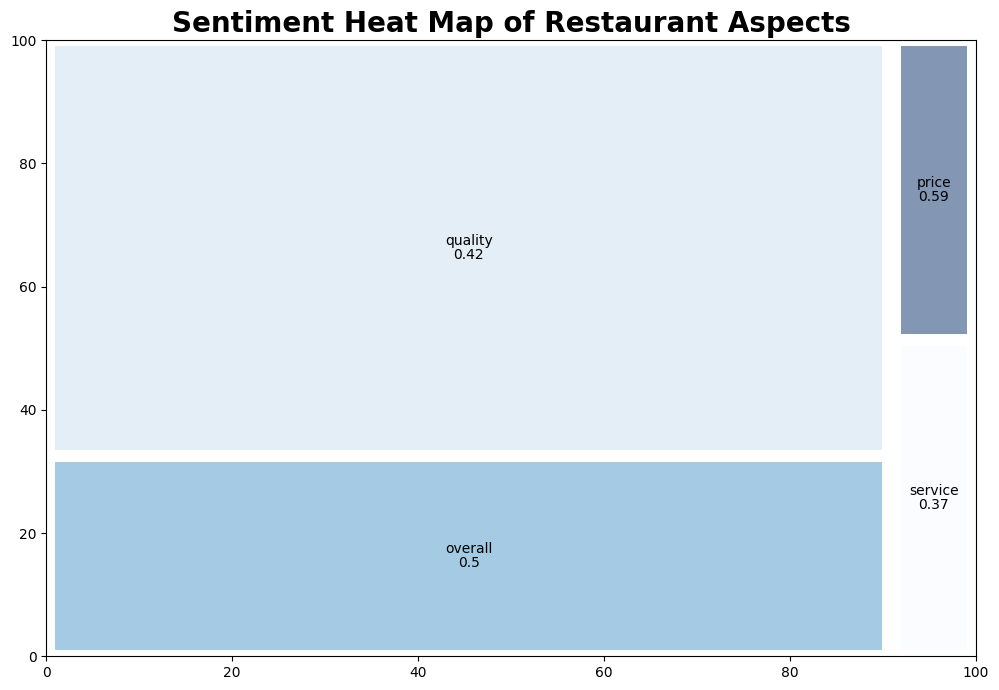

In [22]:
import squarify
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

norm = matplotlib.colors.Normalize(vmin=min(df_summary.sentiment), vmax=max(df_summary.sentiment))
colors = [matplotlib.cm.Blues(norm(value)) for value in df_summary.sentiment]

fig = plt.gcf()
fig.set_size_inches(12, 8)

#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
# Also used color intensity to reflect the sentiment value.
squarify.plot(label=df_summary.category,sizes=df_summary.Total, value = df_summary.sentiment,color = colors, alpha=.5, pad =True)
plt.title("Sentiment Heat Map of Restaurant Aspects",fontsize=20,fontweight="bold")